### ADAM(Adaptive Moment Estimation) Optimizer
- Exponential-Weighted-average(EWA) of gradients to smooth out the noise-phone estimates of gradient obtained using mini-batch-SGD[Momentum Based updates]
- Adaptive learning rate using EWA of squares of gradients.

### Weight Initillzation
- Fan-in and Fan-out
- Glorot Uniform and Gaussian 
- He' Uniform and Gaussian

In [1]:
import numpy as np
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [2]:
def loss_function(m):
    return m**2-2*m+1
## take derivative
def grad_function(m):
    return 2*m-2
def check_convergence(w0, w1):
    return (w0 == w1)

In [3]:
w_0 = 0
b_0 = 0
adam = AdamOptim()
t = 1 
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.009999999950000001
iteration 2: weight=0.01999725400385255
iteration 3: weight=0.029989900621600046
iteration 4: weight=0.039976060276935343
iteration 5: weight=0.049953839711732076
iteration 6: weight=0.05992133621693422
iteration 7: weight=0.06987664190678831
iteration 8: weight=0.07981784795404925
iteration 9: weight=0.08974304875491491
iteration 10: weight=0.0996503459940126
iteration 11: weight=0.10953785258172263
iteration 12: weight=0.11940369643843479
iteration 13: weight=0.12924602410293135
iteration 14: weight=0.13906300414491304
iteration 15: weight=0.14885283036466956
iteration 16: weight=0.15861372476597732
iteration 17: weight=0.1683439402914239
iteration 18: weight=0.17804176331244895
iteration 19: weight=0.1877055158694015
iteration 20: weight=0.19733355765979776
iteration 21: weight=0.2069242877756729
iteration 22: weight=0.21647614619342795
iteration 23: weight=0.22598761502184558
iteration 24: weight=0.23545721951596985
iteration 25: weight=0.24

C:\Users\RISHAB~1\AppData\Local\Temp/ipykernel_12412/394801569.py:32: RuntimeWarning: invalid value encountered in sqrt
  b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


C:\Users\RISHAB~1\AppData\Local\Temp/ipykernel_6632/2614152050.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


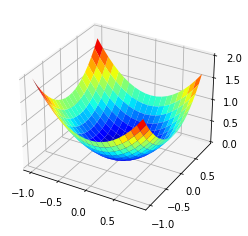

In [5]:
# Source https://machinelearningmastery.com/adam-optimization-from-scratch/
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from numpy import asarray
 
# objective function
def objective(x, y):
 return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0

# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

# compute targets
results = objective(x, y)

# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

# show the plot
pyplot.show()

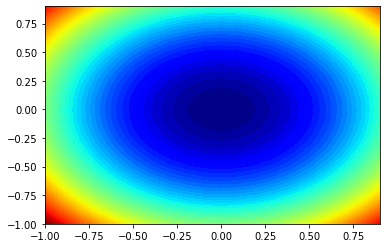

In [6]:
# contour plot of the test function

# objective function
def objective(x, y):
 return x**2.0 + y**2.0
 
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

# compute targets
results = objective(x, y)

# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# show the plot
pyplot.show()

In [25]:
# gradient descent algorithm with adam for a two-dimensional test functiom
from math import sqrt

def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])

    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(bounds.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha  * mhat(t) / (sqrt(vhat(t)) + ep)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
    # evaluate candidate point
    score = objective(x[0], x[1])
    # keep track of solutions
    # report progress
    print('>%d f(%s) = %.5f' % (t, x, score))
    return [x,score]

In [27]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 200
# steps size
alpha = 0.001
# factor for average gradient
beta1 = 0.9
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best,score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f'%(best,score))

>199 f([-0.02714071  0.26106804]) = 0.06889
Done!
f([-0.02714071  0.26106804]) = 0.068893


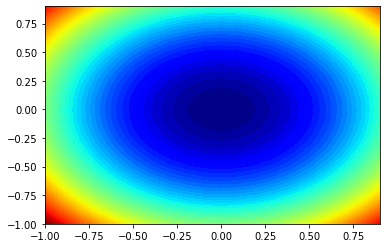

In [19]:
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')